# Imports

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load

In [2]:
data = pd.read_csv("data/data_cleaned.csv")

# Data Preparation

In [3]:
# one hot
data = pd.get_dummies(data, prefix = ["HEAT", "AC", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"], columns = ["HEAT", "AC", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"])
# split
x_data = data.drop(["PRICE"], axis=1)
y_data = data["PRICE"]
# normalization
x_data = x_data.astype(float)
x_data = x_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# train & test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Bagging Regressor

In [4]:
model = BaggingRegressor(n_estimators=500, n_jobs=-1, oob_score=True)
model.fit(x_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\D070703\AppData\Local\Temp\joblib_memmaping_pool_26804_1208516401528
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)


0.86511798170549559

In [ ]:
y_pred = model.predict(x_test)

In [9]:
print("R2 Score: " + str(r2_score(y_test, y_pred)))
print("Explained variance score: " + str(explained_variance_score(y_test, y_pred)))
print("Mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("Mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))
print("Mean squared error: " + str(mean_squared_error(y_test, y_pred)))

R2 Score: 0.865117981705
Explained variance score: 0.865119634493
Mean absolute error: 90394.5458133
Mean absolute percentage error: 22.8091760143
Mean squared error: 27896334206.0


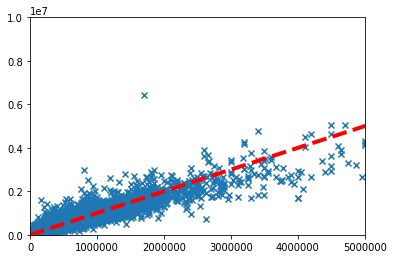

In [5]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='x')
plt.xlim(0, 5e6)
plt.ylim(0, 1e7)
ax.plot([0, y_test.max()], [0, y_test.max()], 'r--', lw=4)
plt.show()

# Save prediction

In [6]:
pred_train = model.predict(x_train)
pd.DataFrame(pred_train).to_csv("predictions/bagging.csv", index=False)
pd.DataFrame(y_pred).to_csv("predictions/bagging_test.csv", index=False)